In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import simulate
import seaborn as sns
import calculate_return as cr
pd.set_option('display.float_format', lambda x: '%.3f' % x)
pd.set_option('display.max_rows', 1000)
plt.style.use('seaborn')

Fetching data

In [2]:
GARCH = cr.fetch_returns(sim_type = 'garch', random_seeds = range(10000))
norm = cr.fetch_returns(sim_type = 'norm', random_seeds = range(10000))

In [3]:
t = cr.fetch_returns(sim_type = 't', random_seeds = range(10000))
draw = cr.fetch_returns(sim_type = 'draw', random_seeds = range(10000))

Combining data

In [10]:
def variable(variable):
    Data=GARCH[[variable]].rename(columns={variable:'GARCH'})
    Data["Normal"]=norm[variable]
    Data["Student's t"]=t[variable]
    Data["Draws"]=draw[variable]
    return Data

Plotting figure

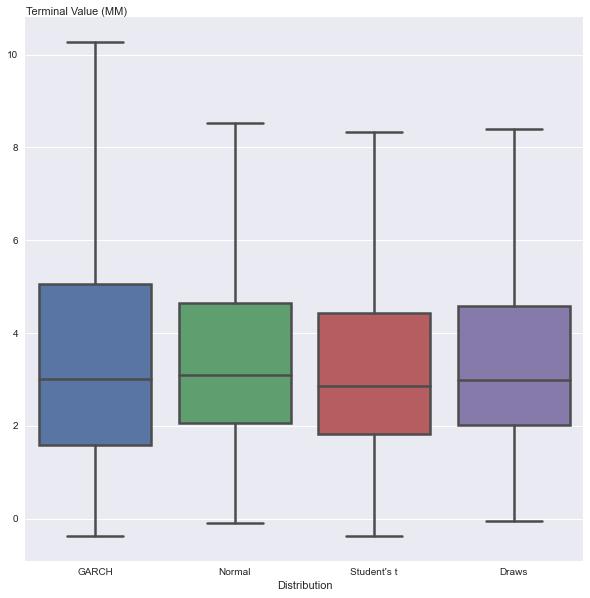

In [17]:
variable("single_phase")
x = Data.loc[(slice(None), '2070-01-01'),:]
x = pd.melt(x)
x['value'] = x['value'].div(1000000) #Convert into millions
f, ax = plt.subplots(figsize=(10,10))
ax = sns.boxplot(x='variable',y='value',data=x,showfliers = False,linewidth=2.5)
ax.set_ylabel("Terminal Value (MM)", rotation=0, loc='top', labelpad=-120 )
plt.xlabel("Distribution")
plt.ticklabel_format(style='plain', axis='y',useOffset=True)
plt.savefig("Robustness/boxplot_SIM_S.png", bbox_inches = 'tight', pad_inches = 0.1)

Defaults per strategy

In [6]:
GARCH_defaulted = GARCH.loc[(slice(None), '2070-01-01'),:]
GARCH_defaulted = GARCH_defaulted[GARCH_defaulted['tv_u'] <= 0].reset_index()#.sample(n=5)
defaulted_GARCH=GARCH_defaulted['random_state'].tolist()

t_defaulted = t.loc[(slice(None), '2070-01-01'),:]
t_defaulted = t_defaulted[t_defaulted['tv_u'] <= 0].reset_index()#.sample(n=5)
defaulted_t=t_defaulted['random_state'].tolist()

norm_defaulted = norm.loc[(slice(None), '2070-01-01'),:]
norm_defaulted = norm_defaulted[norm_defaulted['tv_u'] <= 0].reset_index()#.sample(n=5)
defaulted_norm=norm_defaulted['random_state'].tolist()

draw_defaulted = draw.loc[(slice(None), '2070-01-01'),:]
draw_defaulted = draw_defaulted[draw_defaulted['tv_u'] <= 0].reset_index()#.sample(n=5)
defaulted_draw=draw_defaulted['random_state'].tolist()
#print number of defaults
print(len(defaulted_GARCH))
print(len(defaulted_t))
print(len(defaulted_norm))
print(len(defaulted_draw))

112
78
0
0


In [7]:
print(t["market_returns"].mean())
print(GARCH["market_returns"].mean())
print(norm["market_returns"].mean())
print(draw["market_returns"].mean())

0.006124951207506208
0.00651876230908018
0.006274889207486074
0.006224014091965755
